In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs as make_moons

X , y = make_moons(n_samples=1000, random_state=101)

In [3]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3 , n_init=10, init_params='k-means++', max_iter=10**6)

In [4]:
gm.fit(X)

GaussianMixture(init_params='k-means++', max_iter=1000000, n_components=3,
                n_init=10)

<Axes: >

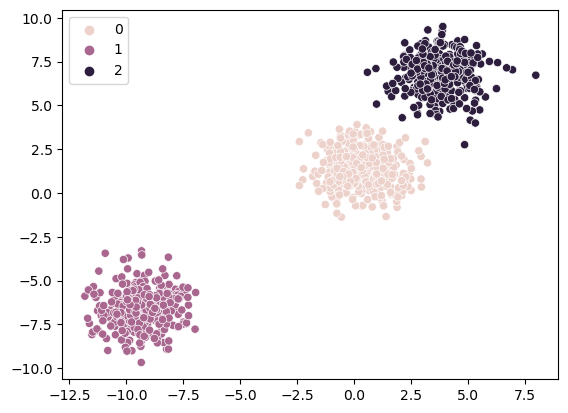

In [5]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

<Axes: >

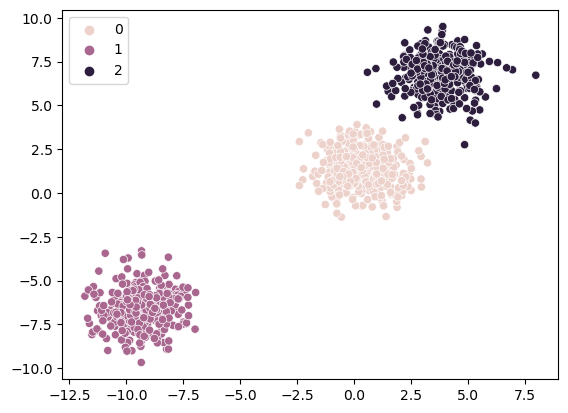

In [6]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=gm.predict(X))


In [9]:
# Probablity density
gm.score_samples([[1,1]])

array([-3.27100983])

## Outlier Detection using Probablity density 

In [10]:
density = gm.score_samples(X)

In [12]:
density_threashod = np.percentile(density, 4)

In [15]:
outliers = X[density < density_threashod]

<Axes: >

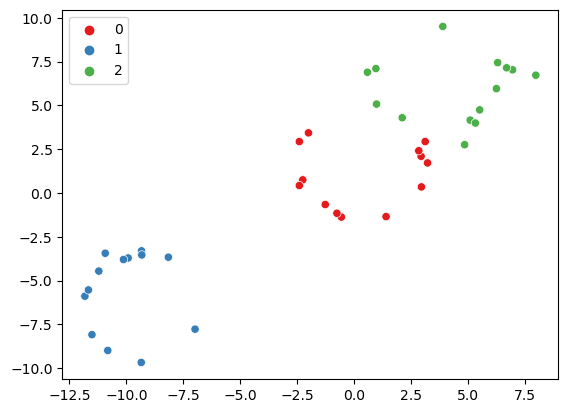

In [19]:
sns.scatterplot(x=outliers[:,0], y=outliers[:,1], hue=gm.predict(outliers), palette='Set1')

## BIC and AIC metric

In [69]:
def plot_bic_aic_curve(data: X, k=np.arange(1,10)):
    """Plots the BIC and AIC graph as a function of k.

    Used for hyperparameter selection for the Gaussian Mixture Models. 
    Note computational complexity is O(kmn2 + kn3) , where m is no of samples , n is no of feature.
    Suggested to perform dimensionality reduction for big feature space.
    

    Parameters
    ----------
    data
        Traning data: X.shape = (n_observation, n_fetures)
    k, optional
        Number of Gaussian to fit the data- must be iterable, by default np.arange(1,10)
    """


    from sklearn.mixture import GaussianMixture
    import matplotlib.pyplot as plt
    BIC = []
    AIC = []
    for gaussians in k:
        gm = GaussianMixture(n_components=gaussians, init_params='k-means++', n_init=3)
        gm.fit(X)
        BIC.append(gm.bic(X))
        AIC.append(gm.aic(X))
    

    fig , ax = plt.subplots(1,1)

    ax.plot(k, BIC, color='purple', ls='--', marker='o', label='BIC CURVE')
    ax.plot(k, AIC, color='green', ls='dashdot', marker='o', label='AIC CURVE')  
    
    ax.grid(visible=True, which='both', axis='both')
    fig.legend(loc='upper right')
    fig.tight_layout()
    plt.show()
    

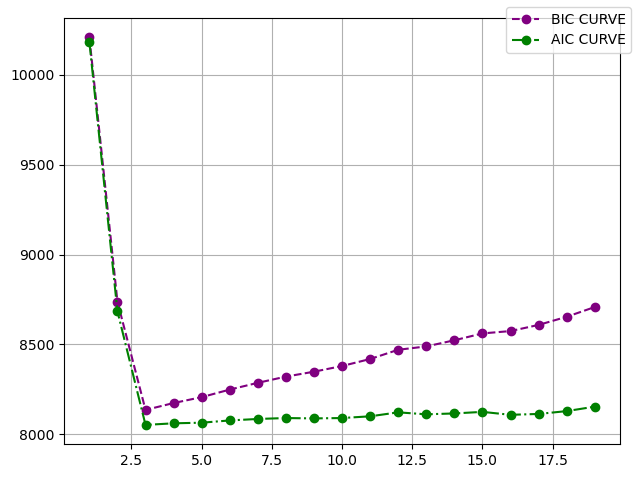

In [70]:
plot_bic_aic_curve(X, k=np.arange(1,20))